In [1]:
import pandas as pd 
import numpy as np

from scipy.stats import wasserstein_distance
from sklearn.metrics import mean_absolute_error
import krippendorff

import seaborn as sns
import matplotlib.pyplot as plt


This notebooks contains the analysis and experiment results of the paper "Towards a Perspectivist Turn in Computational Argumentation". Note that it assumes the datasets to be preprocessed and formated such that each annotator, per argument quality dimension, has their own column (i.e. overall_quality_42).

# Inter-annotator agreements per group and group combination

## Dagstuhl

In [2]:
df_expert = pd.read_csv("dagstuhl_expert_dense.csv")
df_crowd = pd.read_csv("dagstuhl_crowd.csv")
df_novice = pd.read_csv("dagstuhl_novice.csv")

# remove arguments that are not in the expert dataset
df_novice = df_novice[df_novice['#id'].isin(df_expert['#id'])]

In [3]:
len(df_expert), len(df_crowd), len(df_novice) # sanity check

(304, 304, 304)

In [4]:
dimensions = [col.replace("_mean", "") for col in df_expert.columns if col.endswith("_mean")]

In [5]:
dimensions

['appropriateness',
 'arrangement',
 'clarity',
 'cogency',
 'credibility',
 'effectiveness',
 'emotional_appeal',
 'global_acceptability',
 'global_relevance',
 'global_sufficiency',
 'local_acceptability',
 'local_relevance',
 'local_sufficiency',
 'overall_quality',
 'reasonableness']

In [6]:
alphas = {}
for dim in dimensions:
    alphas[dim] = {}
    # calculate alpha for expert, novice and crowd
    # Transpose necessary to have annotators as rows, as expected by the function
    cols_expert = [col for col in df_expert.columns if col.startswith(dim) and not "mean" in col and not "majority" in col]
    alphas[dim]["expert"] = krippendorff.alpha(df_expert[cols_expert].values.T)
    cols_novice = [col for col in df_novice.columns if col.startswith(dim) and not "mean" in col and not "majority" in col]
    alphas[dim]["novice"] = krippendorff.alpha(df_novice[cols_novice].values.T)
    cols_crowd = [col for col in df_crowd.columns if col.startswith(dim) and not "mean" in col and not "majority" in col]
    alphas[dim]["crowd"] = krippendorff.alpha(df_crowd[cols_crowd].values.T)
    # calculate alpha for expert + novice
    alphas[dim]["expert_novice"] = krippendorff.alpha(np.concatenate([df_expert[cols_expert].values, df_novice[cols_novice].values], axis=1).T)
    # calculate alpha for expert + crowd
    alphas[dim]["expert_crowd"] = krippendorff.alpha(np.concatenate([df_expert[cols_expert].values, df_crowd[cols_crowd].values], axis=1).T)
    # calculate alpha for crowd + novice
    alphas[dim]["crowd_novice"] = krippendorff.alpha(np.concatenate([df_crowd[cols_crowd].values, df_novice[cols_novice].values], axis=1).T)
    # calculate alpha for expert + crowd + novice
    alphas[dim]["expert_crowd_novice"] = krippendorff.alpha(np.concatenate([df_expert[cols_expert].values, df_crowd[cols_crowd].values, df_novice[cols_novice].values], axis=1).T)

In [7]:
df_alphas = pd.DataFrame(alphas)

In [8]:
df_alphas

,appropriateness,arrangement,clarity,cogency,credibility,effectiveness,emotional_appeal,global_acceptability,global_relevance,global_sufficiency,local_acceptability,local_relevance,local_sufficiency,overall_quality,reasonableness
expert,0.178735,0.249506,0.257985,0.371970,0.220590,0.313594,0.211382,0.382160,0.263514,0.179571,0.330604,0.406003,0.285176,0.443060,0.436521
novice,0.179204,0.192341,0.128355,0.229983,0.162165,0.207981,0.193768,0.227050,0.217297,0.112015,0.291613,0.227029,0.176189,0.233049,0.196850
crowd,0.118759,0.098111,0.111008,0.098801,0.110296,0.106818,0.088325,0.085275,0.079468,0.095382,0.133081,0.114694,0.072549,0.140453,0.111066
expert_novice,0.059729,0.086116,0.079435,0.113952,0.063739,0.098215,0.099623,0.127799,0.102747,0.049234,0.124517,0.120201,0.083145,0.125907,0.134010
expert_crowd,0.148539,0.131654,0.131734,0.129268,0.129559,0.121411,0.106520,0.142902,0.115343,0.087668,0.163305,0.155145,0.289572,0.180403,0.143413
crowd_novice,0.066712,0.063656,0.067155,0.059793,0.059918,0.071657,0.067002,0.059075,0.050928,0.053424,0.085758,0.070459,0.150241,0.083323,0.071141
expert_crowd_novice,0.088531,0.085592,0.084649,0.082893,0.073386,0.085238,0.078298,0.092558,0.074157,0.055180,0.105692,0.097336,0.084736,0.114938,0.098171


In [9]:
print(df_alphas[["cogency", "effectiveness", "reasonableness", "overall_quality"]].round(3).to_latex().replace("000", "")) # print latex table

\begin{tabular}{lrrrr}
\toprule
 & cogency & effectiveness & reasonableness & overall_quality \\
\midrule
expert & 0.372 & 0.314 & 0.437 & 0.443 \\
novice & 0.230 & 0.208 & 0.197 & 0.233 \\
crowd & 0.099 & 0.107 & 0.111 & 0.140 \\
expert_novice & 0.114 & 0.098 & 0.134 & 0.126 \\
expert_crowd & 0.129 & 0.121 & 0.143 & 0.180 \\
crowd_novice & 0.060 & 0.072 & 0.071 & 0.083 \\
expert_crowd_novice & 0.083 & 0.085 & 0.098 & 0.115 \\
\bottomrule
\end{tabular}



In [12]:
df_alphas.to_csv("dagstuhl_alphas.csv")

## GAQ

In [2]:
df = pd.read_csv("gaq.csv")

Experts have id 18-20, crowd annotators 1-17.
GAQ only has overall quality and the three higher-level categories.

In [3]:
dimensions = [col.replace("_mean", "") for col in df.columns if col.endswith("_mean")]
dimensions

['cogency', 'effectiveness', 'reasonableness', 'overall_quality']

In [12]:
len(df)

538

In [13]:
alphas = {}
for dim in dimensions:
    alphas[dim] = {}
    # calculate alpha for experts
    expert_cols = [f"{dim}_{i}" for i in range(18,21)]
    alphas[dim]["expert"] = krippendorff.alpha(df[expert_cols].values.T)
    # calculate alpha for crowd
    crowd_cols = [f"{dim}_{i}" for i in range(1,18)]
    alphas[dim]["crowd"] = krippendorff.alpha(df[crowd_cols].values.T)
    # calculate alpha for expert + crowd
    alphas[dim]["expert_crowd"] = krippendorff.alpha(np.concatenate([df[expert_cols].values, df[crowd_cols].values], axis=1).T)

In [14]:
alphas

{'cogency': {'expert': np.float64(0.17486865216245384),
  'crowd': np.float64(0.15629329557493965),
  'expert_crowd': np.float64(0.14223577578793933)},
 'effectiveness': {'expert': np.float64(0.27158888478514154),
  'crowd': np.float64(0.14817698468094231),
  'expert_crowd': np.float64(0.1416571042896838)},
 'reasonableness': {'expert': np.float64(0.25807293942382525),
  'crowd': np.float64(0.15371670814483307),
  'expert_crowd': np.float64(0.15009466229390234)},
 'overall_quality': {'expert': np.float64(0.2540141102055711),
  'crowd': np.float64(0.17312181345194644),
  'expert_crowd': np.float64(0.16528691999201273)}}

In [15]:
alphas_df = pd.DataFrame(alphas)
alphas_df

,cogency,effectiveness,reasonableness,overall_quality
expert,0.174869,0.271589,0.258073,0.254014
crowd,0.156293,0.148177,0.153717,0.173122
expert_crowd,0.142236,0.141657,0.150095,0.165287


In [19]:
alphas_df.to_csv("gaq_alphas.csv")

In [16]:
print(alphas_df.round(3).to_latex().replace("000", ""))

\begin{tabular}{lrrrr}
\toprule
 & cogency & effectiveness & reasonableness & overall_quality \\
\midrule
expert & 0.175 & 0.272 & 0.258 & 0.254 \\
crowd & 0.156 & 0.148 & 0.154 & 0.173 \\
expert_crowd & 0.142 & 0.142 & 0.150 & 0.165 \\
\bottomrule
\end{tabular}



# MAE and Wasserstein Distance
For each argument quality dimension, we calculate the wasserstein distance between the groups' annotations' distributions and the euclidean distance (absolute difference) between the two means and the majority votes. Additionally, we compute the mean average error (MAE).

## Dagstuhl 
Expert vs. Crowd
3 annotators for the expert corpus, 102 for the crowd corpus.

In [17]:
df_expert = pd.read_csv("dagstuhl_expert_dense.csv")
df_crowd = pd.read_csv("dagstuhl_crowd.csv")
df_novice = pd.read_csv("dagstuhl_novice.csv")

# remove arguments that are not in the expert dataset
df_novice = df_novice[df_novice['#id'].isin(df_expert['#id'])]

expert_annotators = 3
crowd_annotators = 102
novice_annotators = 108
num_labels = 3

In [18]:
df_expert.head()

,#id,argument,issue,stance,appropriateness_1,appropriateness_2,appropriateness_3,appropriateness_mean,appropriateness_majority,arrangement_1,...,overall_quality_1,overall_quality_2,overall_quality_3,overall_quality_mean,overall_quality_majority,reasonableness_1,reasonableness_2,reasonableness_3,reasonableness_mean,reasonableness_majority
0,arg219250,"it is true that bottled water is a waste, but ...",ban-plastic-water-bottles,no-bad-for-the-economy,1.0,2.0,2.0,1.666667,2.0,1.0,...,1.0,1.0,2.0,1.333333,1.0,1.0,2.0,2.0,1.666667,2.0
1,arg219293,Most Americans on average recycle 86-88% of th...,ban-plastic-water-bottles,no-bad-for-the-economy,2.0,1.0,2.0,1.666667,2.0,2.0,...,2.0,1.0,2.0,1.666667,2.0,2.0,1.0,2.0,1.666667,2.0
2,arg219258,Banning bottled water would hurt the economy b...,ban-plastic-water-bottles,no-bad-for-the-economy,2.0,3.0,3.0,2.666667,3.0,2.0,...,2.0,1.0,3.0,2.000000,2.0,2.0,2.0,2.0,2.000000,2.0
3,arg219259,Bottled water is somewhat less likely to be fo...,ban-plastic-water-bottles,no-bad-for-the-economy,3.0,3.0,2.0,2.666667,3.0,3.0,...,2.0,2.0,1.0,1.666667,2.0,2.0,2.0,2.0,2.000000,2.0
4,arg219244,Western Europe consumes almost 50% of the worl...,ban-plastic-water-bottles,no-bad-for-the-economy,1.0,3.0,2.0,2.000000,2.0,1.0,...,2.0,1.0,1.0,1.333333,1.0,2.0,1.0,2.0,1.666667,2.0


In [19]:
dimensions = [col.replace("_mean", "") for col in df_expert.columns if col.endswith('_mean')]
dimensions

['appropriateness',
 'arrangement',
 'clarity',
 'cogency',
 'credibility',
 'effectiveness',
 'emotional_appeal',
 'global_acceptability',
 'global_relevance',
 'global_sufficiency',
 'local_acceptability',
 'local_relevance',
 'local_sufficiency',
 'overall_quality',
 'reasonableness']

#### MAE

In [20]:
maes = {}
for dim in ["cogency", "effectiveness", "reasonableness", "overall_quality"]:
    maes[dim] = {}
    # calculate MAE for expert, novice and crowd
    maes[dim]["expert-novice"] = mean_absolute_error(df_expert[f"{dim}_mean"], df_novice[f"{dim}_mean"])
    maes[dim]["expert-crowd"] = mean_absolute_error(df_expert[f"{dim}_mean"], df_crowd[f"{dim}_mean"])
    maes[dim]["novice-crowd"] = mean_absolute_error(df_novice[f"{dim}_mean"], df_crowd[f"{dim}_mean"])

In [21]:
maes_df = pd.DataFrame(maes)
maes_df

,cogency,effectiveness,reasonableness,overall_quality
expert-novice,0.696922,0.713839,0.604527,0.685785
expert-crowd,0.499072,0.529580,0.462659,0.427900
novice-crowd,0.506567,0.465856,0.453765,0.480937


For all dimensions

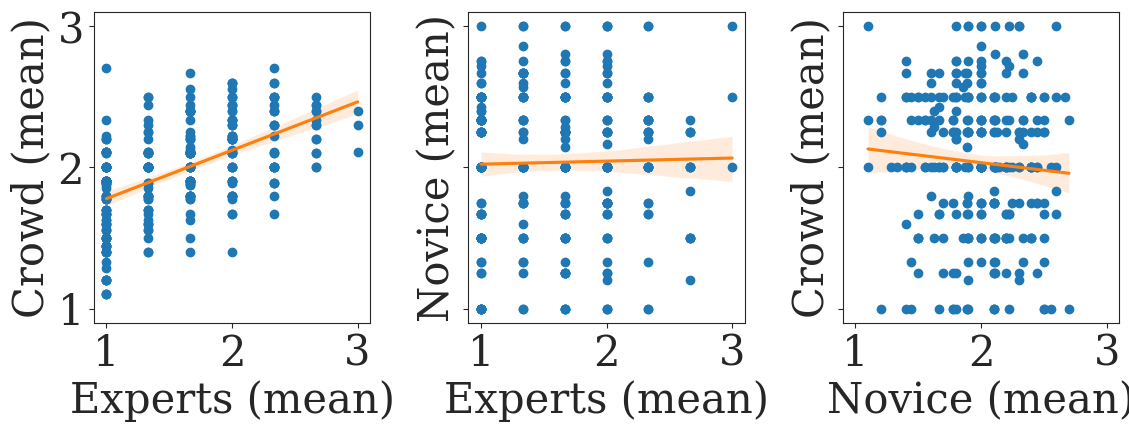

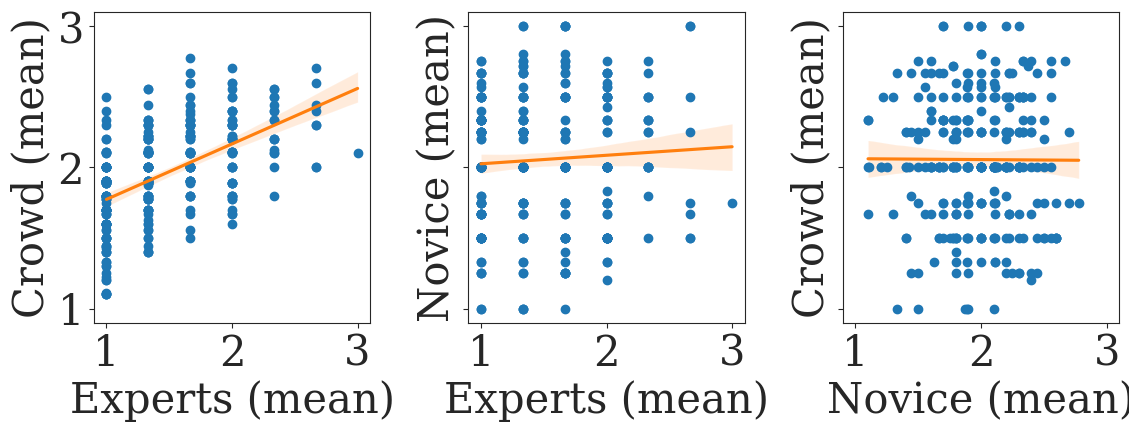

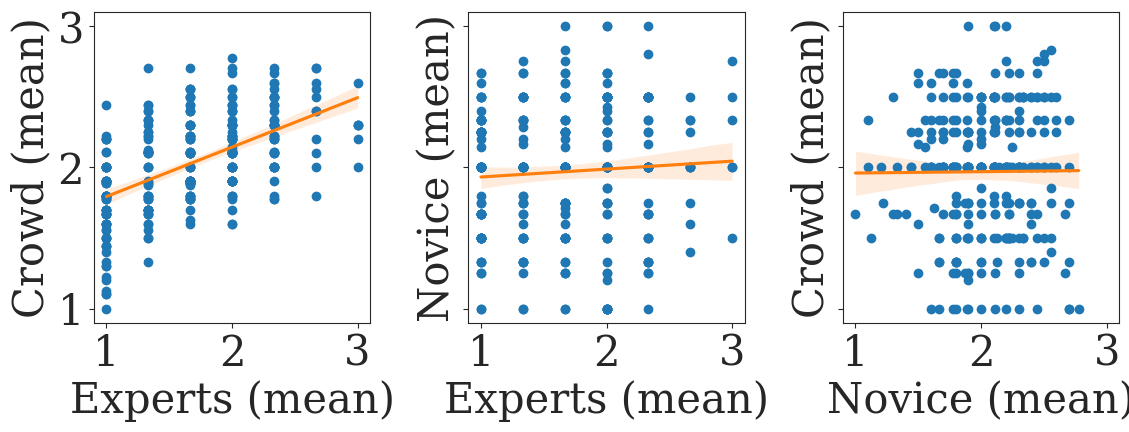

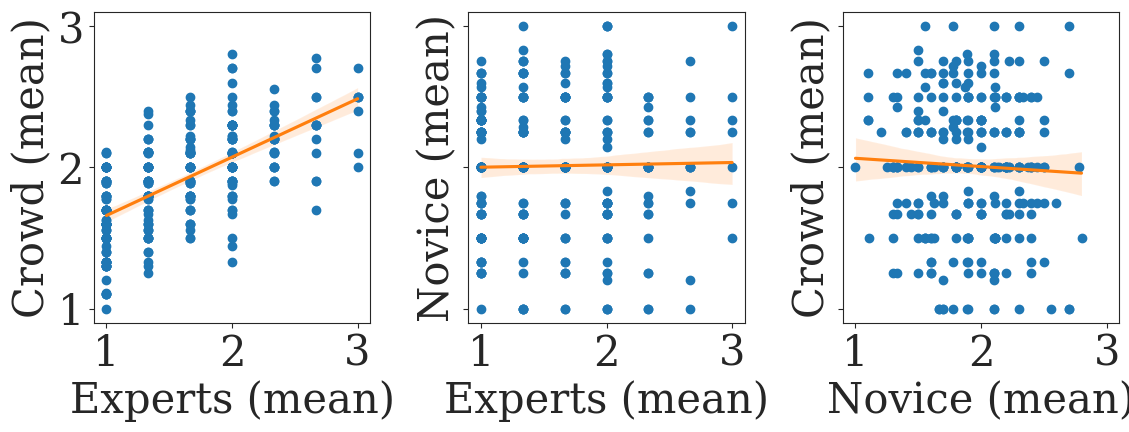

In [22]:
sns.set_style("ticks")
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 30})
for dim in ["cogency", "effectiveness", "reasonableness", "overall_quality"]:
    fig, axs = plt.subplots(1, 3, figsize=(12,5), sharey=True, sharex=True)
    axs[0].set_yticks([1,2,3])
    axs[0].plot(df_expert[f"{dim}_mean"], df_crowd[f"{dim}_mean"], "o")
    sns.regplot(x=df_expert[f"{dim}_mean"].values, y=df_crowd[f"{dim}_mean"].values, scatter=False, order=1, ax=axs[0])
    axs[0].set_xlabel("Experts (mean)")
    axs[0].set_ylabel("Crowd (mean)")
    axs[1].plot(df_expert[f"{dim}_mean"], df_novice[f"{dim}_mean"], "o")
    sns.regplot(x=df_expert[f"{dim}_mean"].values, y=df_novice[f"{dim}_mean"].values, scatter=False, ax=axs[1])
    axs[1].set_xlabel("Experts (mean)")
    axs[1].set_ylabel("Novice (mean)")
    axs[2].plot(df_crowd[f"{dim}_mean"], df_novice[f"{dim}_mean"], "o")
    sns.regplot(x=df_crowd[f"{dim}_mean"].values, y=df_novice[f"{dim}_mean"].values, scatter=False, ax=axs[2])
    axs[2].set_ylabel("Crowd (mean)")
    axs[2].set_xlabel("Novice (mean)")
    plt.tight_layout()
    plt.savefig(f"scatter_{dim}_dagstuhl.pdf", bbox_inches="tight")
    plt.show()

#### Calculate Wasserstein

In [23]:
res_cols = ["id"]
for dim in dimensions:
    res_cols.append(dim+"_wasserstein")
    res_cols.append(dim+"_mean_diff")
    res_cols.append(dim+"_majority_diff")
res_cols

['id',
 'appropriateness_wasserstein',
 'appropriateness_mean_diff',
 'appropriateness_majority_diff',
 'arrangement_wasserstein',
 'arrangement_mean_diff',
 'arrangement_majority_diff',
 'clarity_wasserstein',
 'clarity_mean_diff',
 'clarity_majority_diff',
 'cogency_wasserstein',
 'cogency_mean_diff',
 'cogency_majority_diff',
 'credibility_wasserstein',
 'credibility_mean_diff',
 'credibility_majority_diff',
 'effectiveness_wasserstein',
 'effectiveness_mean_diff',
 'effectiveness_majority_diff',
 'emotional_appeal_wasserstein',
 'emotional_appeal_mean_diff',
 'emotional_appeal_majority_diff',
 'global_acceptability_wasserstein',
 'global_acceptability_mean_diff',
 'global_acceptability_majority_diff',
 'global_relevance_wasserstein',
 'global_relevance_mean_diff',
 'global_relevance_majority_diff',
 'global_sufficiency_wasserstein',
 'global_sufficiency_mean_diff',
 'global_sufficiency_majority_diff',
 'local_acceptability_wasserstein',
 'local_acceptability_mean_diff',
 'local_acc

In [24]:
res_df = pd.DataFrame(columns=res_cols)

In [15]:
def get_distribution(row, dim, num_annotators, num_labels=3):
    labels = [row[dim+f"_{i+1}"] for i in range(num_annotators) if not pd.isnull(row[dim+f"_{i+1}"]) or dim+f"_{i+1}" not in row]
    if len(labels) == 0:
        return np.nan
    distribution = [labels.count(i+1) / len(labels) for i in range(num_labels)]
    return distribution

In [26]:
for _, row in df_expert.iterrows():
    res_row = []
    if len(df_crowd[df_crowd["#id"] == row["#id"]]) != 0:
        res_row.append(row["#id"])
        for dim in dimensions:
            dist_exp = get_distribution(row, dim, expert_annotators)
            dist_crowd = get_distribution(df_crowd[df_crowd["#id"] == row["#id"]].iloc[0], dim, crowd_annotators)
            if dist_crowd is np.nan or dist_exp is np.nan:
                wasserstein = np.nan
            else:
                wasserstein = wasserstein_distance(dist_exp, dist_crowd)
            res_row.append(wasserstein)
            res_row.append(np.abs(row[f"{dim}_mean"] - df_crowd[df_crowd["#id"] == row["#id"]].iloc[0][f"{dim}_mean"]))
            res_row.append(np.abs(row[f"{dim}_majority"] - df_crowd[df_crowd["#id"] == row["#id"]].iloc[0][f"{dim}_majority"]))
        res_df = pd.concat([res_df, pd.DataFrame([res_row], columns=res_cols)])

/var/folders/bn/zpqsg90d5y3g9k334bz2cb600000gn/T/ipykernel_17427/2732934485.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame([res_row], columns=res_cols)])


In [27]:
res_df.head()

,id,appropriateness_wasserstein,appropriateness_mean_diff,appropriateness_majority_diff,arrangement_wasserstein,arrangement_mean_diff,arrangement_majority_diff,clarity_wasserstein,clarity_mean_diff,clarity_majority_diff,...,local_relevance_majority_diff,local_sufficiency_wasserstein,local_sufficiency_mean_diff,local_sufficiency_majority_diff,overall_quality_wasserstein,overall_quality_mean_diff,overall_quality_majority_diff,reasonableness_wasserstein,reasonableness_mean_diff,reasonableness_majority_diff
0,arg219250,0.148148,0.222222,0.0,0.074074,0.222222,0.0,0.148148,0.333333,1.0,...,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.148148,0.111111,1.0
0,arg219293,0.148148,0.000000,1.0,0.370370,0.111111,0.0,0.370370,0.111111,1.0,...,1.0,0.111111,0.166667,0.0,0.074074,0.555556,0.0,0.074074,0.555556,0.0
0,arg219258,0.111111,0.266667,0.0,0.111111,0.300000,1.0,0.111111,0.300000,1.0,...,1.0,0.111111,0.833333,0.0,0.044444,0.100000,1.0,0.333333,0.100000,0.0
0,arg219259,0.022222,0.366667,1.0,0.111111,0.033333,0.0,0.222222,0.500000,0.0,...,0.0,0.222222,1.333333,1.0,0.111111,0.733333,1.0,0.333333,0.100000,0.0
0,arg219244,0.074074,0.111111,0.0,0.177778,0.533333,0.0,0.400000,0.000000,0.0,...,0.0,0.000000,1.000000,1.0,0.066667,0.866667,1.0,0.066667,0.533333,0.0


In [28]:
res_df.describe()

,appropriateness_wasserstein,appropriateness_mean_diff,appropriateness_majority_diff,arrangement_wasserstein,arrangement_mean_diff,arrangement_majority_diff,clarity_wasserstein,clarity_mean_diff,clarity_majority_diff,cogency_wasserstein,...,local_relevance_majority_diff,local_sufficiency_wasserstein,local_sufficiency_mean_diff,local_sufficiency_majority_diff,overall_quality_wasserstein,overall_quality_mean_diff,overall_quality_majority_diff,reasonableness_wasserstein,reasonableness_mean_diff,reasonableness_majority_diff
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,...,304.000000,50.000000,50.000000,50.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,0.145117,0.308497,0.368421,0.163038,0.330796,0.421053,0.169612,0.368578,0.588816,0.195410,...,0.578947,0.157778,0.523333,0.520000,0.179114,0.427900,0.434211,0.184468,0.462659,0.503289
std,0.092014,0.223177,0.483172,0.096504,0.251568,0.545323,0.100848,0.277346,0.555803,0.105976,...,0.551342,0.131065,0.416510,0.504672,0.102983,0.285727,0.528664,0.109863,0.322600,0.591459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.133333,0.000000,0.088889,0.111111,0.000000,0.111111,0.111111,0.000000,0.111111,...,0.000000,0.000000,0.208333,0.000000,0.111111,0.200000,0.000000,0.088889,0.200000,0.000000
50%,0.133333,0.300000,0.000000,0.148148,0.300000,0.000000,0.148148,0.333333,1.000000,0.172222,...,1.000000,0.222222,0.416667,1.000000,0.148148,0.400000,0.000000,0.148148,0.416667,0.000000
75%,0.177778,0.444444,1.000000,0.200000,0.466667,1.000000,0.200000,0.555556,1.000000,0.266667,...,1.000000,0.222222,0.833333,1.000000,0.266667,0.627083,1.000000,0.266667,0.700000,1.000000
max,0.400000,1.100000,1.000000,0.416667,1.222222,2.000000,0.400000,1.111111,2.000000,0.416667,...,2.000000,0.444444,1.500000,1.000000,0.444444,1.111111,2.000000,0.444444,1.444444,2.000000


In [29]:
res_df[["cogency_wasserstein", "effectiveness_wasserstein", "reasonableness_wasserstein", "overall_quality_wasserstein"]].describe()

,cogency_wasserstein,effectiveness_wasserstein,reasonableness_wasserstein,overall_quality_wasserstein
count,304.000000,304.000000,304.000000,304.000000
mean,0.195410,0.194221,0.184468,0.179114
std,0.105976,0.110790,0.109863,0.102983
min,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.111111,0.088889,0.111111
50%,0.172222,0.177778,0.148148,0.148148
75%,0.266667,0.296296,0.266667,0.266667
max,0.416667,0.444444,0.444444,0.444444


Write resulting df

In [34]:
res_df.to_csv("dagstuhl_experts-crowd.csv", index=False)

#### Experts vs. Novices
3 expert annotators and 108 novices

In [30]:
df_novice.head()

,#id,local_relevance_1,local_relevance_2,local_relevance_3,local_relevance_4,local_relevance_5,local_relevance_6,local_relevance_7,local_relevance_8,local_relevance_9,...,overall_quality_101,overall_quality_102,overall_quality_103,overall_quality_104,overall_quality_105,overall_quality_106,overall_quality_107,overall_quality_108,overall_quality_mean,overall_quality_majority
0,29393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.666667,3
1,578317615,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2
2,13993,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.250000,1
3,arg33261,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,2
4,13998,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.250000,2


In [31]:
# we can only compare the novices and the experts on the subdimensions that the novices annotated
dimensions = [col.replace("_mean", "") for col in df_novice.columns if col.endswith('_mean')]

In [32]:
novice_annotators = 108
res_cols = ["id"]
for dim in dimensions:
    res_cols.append(dim+"_wasserstein")
    res_cols.append(dim+"_mean_diff")
    res_cols.append(dim+"_majority_diff")

In [33]:
res_cols

['id',
 'local_relevance_wasserstein',
 'local_relevance_mean_diff',
 'local_relevance_majority_diff',
 'appropriateness_wasserstein',
 'appropriateness_mean_diff',
 'appropriateness_majority_diff',
 'local_sufficiency_wasserstein',
 'local_sufficiency_mean_diff',
 'local_sufficiency_majority_diff',
 'arrangement_wasserstein',
 'arrangement_mean_diff',
 'arrangement_majority_diff',
 'local_acceptability_wasserstein',
 'local_acceptability_mean_diff',
 'local_acceptability_majority_diff',
 'credibility_wasserstein',
 'credibility_mean_diff',
 'credibility_majority_diff',
 'global_acceptability_wasserstein',
 'global_acceptability_mean_diff',
 'global_acceptability_majority_diff',
 'clarity_wasserstein',
 'clarity_mean_diff',
 'clarity_majority_diff',
 'global_sufficiency_wasserstein',
 'global_sufficiency_mean_diff',
 'global_sufficiency_majority_diff',
 'global_relevance_wasserstein',
 'global_relevance_mean_diff',
 'global_relevance_majority_diff',
 'emotional_appeal_wasserstein',
 'e

In [34]:
res_df = pd.DataFrame(columns=res_cols)
for _, row in df_expert.iterrows():
    res_row = []
    if len(df_novice[df_novice["#id"] == row["#id"]]) != 0:
        res_row.append(row["#id"])
        for dim in dimensions:
            dist_exp = get_distribution(row, dim, expert_annotators)
            dist_novice = get_distribution(df_novice[df_novice["#id"] == row["#id"]].iloc[0], dim, novice_annotators)
            if dist_novice is np.nan or dist_exp is np.nan:
                wasserstein = np.nan
            else:
                wasserstein = wasserstein_distance(dist_exp, dist_novice)
            res_row.append(wasserstein)
            res_row.append(np.abs(row[f"{dim}_mean"] - df_novice[df_novice["#id"] == row["#id"]].iloc[0][f"{dim}_mean"]))
            res_row.append(np.abs(row[f"{dim}_majority"] - df_novice[df_novice["#id"] == row["#id"]].iloc[0][f"{dim}_majority"]))
        res_df = pd.concat([res_df, pd.DataFrame([res_row], columns=res_cols)])

/var/folders/bn/zpqsg90d5y3g9k334bz2cb600000gn/T/ipykernel_17427/2476960716.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame([res_row], columns=res_cols)])


In [35]:
res_df.head()

,id,local_relevance_wasserstein,local_relevance_mean_diff,local_relevance_majority_diff,appropriateness_wasserstein,appropriateness_mean_diff,appropriateness_majority_diff,local_sufficiency_wasserstein,local_sufficiency_mean_diff,local_sufficiency_majority_diff,...,cogency_majority_diff,effectiveness_wasserstein,effectiveness_mean_diff,effectiveness_majority_diff,reasonableness_wasserstein,reasonableness_mean_diff,reasonableness_majority_diff,overall_quality_wasserstein,overall_quality_mean_diff,overall_quality_majority_diff
0,arg219250,0.222222,0.333333,1.0,0.111111,0.833333,0.0,0.000000,1.000000,2.0,...,2.0,0.000000,1.000000,1.0,0.166667,0.083333,0.0,0.166667,0.416667,1.0
0,arg219293,0.222222,1.666667,2.0,0.111111,0.166667,1.0,0.222222,0.666667,1.0,...,0.0,0.111111,0.166667,0.0,0.222222,0.666667,0.0,0.222222,0.666667,0.0
0,arg219258,0.000000,0.333333,1.0,0.000000,0.333333,1.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.666667,0.0,0.000000,0.000000,0.0,0.222222,0.333333,0.0
0,arg219259,0.166667,0.666667,1.0,0.055556,0.916667,1.0,0.055556,0.166667,1.0,...,0.0,0.166667,0.250000,0.0,0.333333,0.250000,0.0,0.166667,0.333333,0.0
0,arg219244,0.111111,0.833333,0.0,0.222222,0.000000,1.0,0.000000,1.000000,1.0,...,1.0,0.000000,1.000000,1.0,0.111111,0.833333,0.0,0.222222,0.666667,1.0


In [36]:
res_df.columns

Index(['id', 'local_relevance_wasserstein', 'local_relevance_mean_diff',
       'local_relevance_majority_diff', 'appropriateness_wasserstein',
       'appropriateness_mean_diff', 'appropriateness_majority_diff',
       'local_sufficiency_wasserstein', 'local_sufficiency_mean_diff',
       'local_sufficiency_majority_diff', 'arrangement_wasserstein',
       'arrangement_mean_diff', 'arrangement_majority_diff',
       'local_acceptability_wasserstein', 'local_acceptability_mean_diff',
       'local_acceptability_majority_diff', 'credibility_wasserstein',
       'credibility_mean_diff', 'credibility_majority_diff',
       'global_acceptability_wasserstein', 'global_acceptability_mean_diff',
       'global_acceptability_majority_diff', 'clarity_wasserstein',
       'clarity_mean_diff', 'clarity_majority_diff',
       'global_sufficiency_wasserstein', 'global_sufficiency_mean_diff',
       'global_sufficiency_majority_diff', 'global_relevance_wasserstein',
       'global_relevance_mean_dif

In [37]:
res_df[["cogency_wasserstein", "effectiveness_wasserstein", "reasonableness_wasserstein", "overall_quality_wasserstein"]]

,cogency_wasserstein,effectiveness_wasserstein,reasonableness_wasserstein,overall_quality_wasserstein
0,0.000000,0.000000,0.166667,0.166667
0,0.222222,0.111111,0.222222,0.222222
0,0.000000,0.000000,0.000000,0.222222
0,0.166667,0.166667,0.333333,0.166667
0,0.000000,0.000000,0.111111,0.222222
...,...,...,...,...
0,0.222222,0.222222,0.222222,0.222222
0,0.055556,0.055556,0.055556,0.166667
0,0.000000,0.222222,0.000000,0.222222
0,0.222222,0.222222,0.000000,0.000000


In [38]:
res_df.describe()

,local_relevance_wasserstein,local_relevance_mean_diff,local_relevance_majority_diff,appropriateness_wasserstein,appropriateness_mean_diff,appropriateness_majority_diff,local_sufficiency_wasserstein,local_sufficiency_mean_diff,local_sufficiency_majority_diff,arrangement_wasserstein,...,cogency_majority_diff,effectiveness_wasserstein,effectiveness_mean_diff,effectiveness_majority_diff,reasonableness_wasserstein,reasonableness_mean_diff,reasonableness_majority_diff,overall_quality_wasserstein,overall_quality_mean_diff,overall_quality_majority_diff
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,...,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,0.153765,0.500478,0.700658,0.142398,0.427600,0.625000,0.162014,0.570465,0.588816,0.141735,...,0.618421,0.155148,0.636756,0.674342,0.161048,0.498872,0.493421,0.158156,0.558811,0.601974
std,0.108554,0.394864,0.644243,0.109261,0.344217,0.578064,0.118727,0.433346,0.654010,0.103871,...,0.567947,0.115474,0.417824,0.604602,0.114708,0.370165,0.562839,0.116101,0.406372,0.576889
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.055556,0.250000,0.000000,0.055556,0.166667,0.000000,0.055556,0.237500,0.000000,0.055556,...,0.000000,0.055556,0.333333,0.000000,0.055556,0.250000,0.000000,0.055556,0.250000,0.000000
50%,0.166667,0.333333,1.000000,0.133333,0.333333,1.000000,0.166667,0.500000,0.000000,0.150000,...,1.000000,0.166667,0.583333,1.000000,0.166667,0.333333,0.000000,0.166667,0.500000,1.000000
75%,0.222222,0.666667,1.000000,0.222222,0.666667,1.000000,0.222222,0.916667,1.000000,0.222222,...,1.000000,0.222222,1.000000,1.000000,0.222222,0.719048,1.000000,0.222222,0.800000,1.000000
max,0.444444,2.000000,2.000000,0.444444,1.750000,2.000000,0.444444,2.000000,2.000000,0.444444,...,2.000000,0.444444,1.714286,2.000000,0.444444,1.500000,2.000000,0.444444,1.750000,2.000000


In [27]:
res_df.to_csv("dagstuhl_experts-novices.csv", index=False)

#### Novices vs. Crowd

In [39]:
# we can only compare the novices and the experts on the subdimensions that the novices annotated
# dimensions = [col.replace("_mean", "") for col in df_novice.columns if col.endswith('_mean')]
res_cols = ["id"]
for dim in dimensions:
    res_cols.append(dim+"_wasserstein")
    res_cols.append(dim+"_mean_diff")
    res_cols.append(dim+"_majority_diff")

res_df = pd.DataFrame(columns=res_cols)
for _, row in df_novice.iterrows():
    res_row = []
    if len(df_crowd[df_crowd["#id"] == row["#id"]]) != 0:
        res_row.append(row["#id"])
        for dim in dimensions:
            dist_novice = get_distribution(row, dim, novice_annotators)
            dist_crowd = get_distribution(df_crowd[df_crowd["#id"] == row["#id"]].iloc[0], dim, crowd_annotators)
            if dist_novice is np.nan or dist_crowd is np.nan:
                wasserstein = np.nan
            else:
                wasserstein = wasserstein_distance(dist_novice, dist_crowd)
            res_row.append(wasserstein)
            res_row.append(np.abs(row[f"{dim}_mean"] - df_crowd[df_crowd["#id"] == row["#id"]].iloc[0][f"{dim}_mean"]))
            res_row.append(np.abs(row[f"{dim}_majority"] - df_crowd[df_crowd["#id"] == row["#id"]].iloc[0][f"{dim}_majority"]))
        res_df = pd.concat([res_df, pd.DataFrame([res_row], columns=res_cols)])

/var/folders/bn/zpqsg90d5y3g9k334bz2cb600000gn/T/ipykernel_17427/3649497932.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame([res_row], columns=res_cols)])


In [40]:
res_df[["cogency_wasserstein", "effectiveness_wasserstein", "reasonableness_wasserstein", "overall_quality_wasserstein"]].describe()

,cogency_wasserstein,effectiveness_wasserstein,reasonableness_wasserstein,overall_quality_wasserstein
count,304.000000,304.000000,304.000000,304.000000
mean,0.163697,0.168693,0.161774,0.162981
std,0.097909,0.092947,0.091782,0.097125
min,0.000000,0.000000,0.000000,0.000000
25%,0.088889,0.100000,0.088889,0.100000
50%,0.148148,0.148148,0.148148,0.133333
75%,0.203704,0.222222,0.203704,0.200000
max,0.444444,0.416667,0.400000,0.444444


In [41]:
res_df.head()

,id,local_relevance_wasserstein,local_relevance_mean_diff,local_relevance_majority_diff,appropriateness_wasserstein,appropriateness_mean_diff,appropriateness_majority_diff,local_sufficiency_wasserstein,local_sufficiency_mean_diff,local_sufficiency_majority_diff,...,cogency_majority_diff,effectiveness_wasserstein,effectiveness_mean_diff,effectiveness_majority_diff,reasonableness_wasserstein,reasonableness_mean_diff,reasonableness_majority_diff,overall_quality_wasserstein,overall_quality_mean_diff,overall_quality_majority_diff
0,29393,0.066667,0.466667,1.0,0.133333,0.366667,0.0,NaN,NaN,NaN,...,0.0,0.111111,0.566667,0.0,0.074074,0.222222,0.0,0.111111,0.366667,1.0
0,578317615,0.074074,0.166667,0.0,0.133333,0.000000,1.0,NaN,NaN,NaN,...,1.0,0.296296,0.333333,1.0,0.074074,0.305556,1.0,0.296296,0.444444,1.0
0,13993,0.066667,0.150000,0.0,0.133333,0.266667,0.0,NaN,NaN,NaN,...,0.0,0.083333,0.250000,0.0,0.129630,0.277778,0.0,0.033333,0.350000,0.0
0,arg33261,0.166667,0.350000,0.0,0.233333,0.550000,1.0,NaN,NaN,NaN,...,0.0,0.133333,0.400000,0.0,0.133333,0.200000,1.0,0.133333,0.000000,1.0
0,13998,0.200000,0.400000,0.0,0.092593,0.222222,0.0,NaN,NaN,NaN,...,0.0,0.111111,0.361111,0.0,0.133333,0.100000,0.0,0.100000,0.050000,0.0


In [42]:
res_df.describe()

,local_relevance_wasserstein,local_relevance_mean_diff,local_relevance_majority_diff,appropriateness_wasserstein,appropriateness_mean_diff,appropriateness_majority_diff,local_sufficiency_wasserstein,local_sufficiency_mean_diff,local_sufficiency_majority_diff,arrangement_wasserstein,...,cogency_majority_diff,effectiveness_wasserstein,effectiveness_mean_diff,effectiveness_majority_diff,reasonableness_wasserstein,reasonableness_mean_diff,reasonableness_majority_diff,overall_quality_wasserstein,overall_quality_mean_diff,overall_quality_majority_diff
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,50.000000,50.000000,50.000000,304.000000,...,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,0.161740,0.410029,0.674342,0.155826,0.379719,0.605263,0.223524,0.508286,0.600000,0.165509,...,0.555921,0.168693,0.354969,0.539474,0.161774,0.388215,0.523026,0.162981,0.376269,0.509868
std,0.092228,0.295515,0.641677,0.087183,0.299151,0.581995,0.131700,0.337535,0.606092,0.092652,...,0.565946,0.092947,0.268523,0.573123,0.091782,0.286936,0.532256,0.097125,0.272572,0.562791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091667,0.166667,0.000000,0.088889,0.150000,0.000000,0.111111,0.308333,0.000000,0.098148,...,0.000000,0.100000,0.133333,0.000000,0.088889,0.166667,0.000000,0.100000,0.166667,0.000000
50%,0.148148,0.350000,1.000000,0.133333,0.300000,1.000000,0.222222,0.500000,1.000000,0.148148,...,1.000000,0.148148,0.300000,0.500000,0.148148,0.333333,1.000000,0.133333,0.317063,0.000000
75%,0.200000,0.600000,1.000000,0.200000,0.550000,1.000000,0.333333,0.666667,1.000000,0.203704,...,1.000000,0.222222,0.500000,1.000000,0.203704,0.587500,1.000000,0.200000,0.537500,1.000000
max,0.400000,1.400000,2.000000,0.400000,1.333333,2.000000,0.444444,1.500000,2.000000,0.444444,...,2.000000,0.416667,1.333333,2.000000,0.400000,1.444444,2.000000,0.444444,1.222222,2.000000


In [31]:
res_df.to_csv("dagstuhl_novices-crowd.csv", index=False)

## GAQ
Again, indices for experts are 18-20, for crowd 1-17

In [4]:
expert_annotators = 3
crowd_annotators = 17

In [5]:
df = pd.read_csv("datasets/analysis/GAQ_mixed_prep+cleaned_sparse.csv")

### MAE

In [6]:
maes = {}
for dim in ["cogency", "effectiveness", "reasonableness", "overall_quality"]:
    maes[dim] = {}
    # calculate MAE for expert, novice and crowd
    maes[dim]["expert-crowd"] = mean_absolute_error(df[f"{dim}_mean_crowd"], df[f"{dim}_mean_experts"])
maes_df = pd.DataFrame(maes)
maes_df

,cogency,effectiveness,reasonableness,overall_quality
expert-crowd,0.697401,0.751469,0.628712,0.659662


In [7]:
df["overall_quality_mean_crowd"].describe()

count    538.000000
mean       2.602754
std        0.480674
min        1.142857
25%        2.300000
50%        2.600000
75%        2.900000
max        4.000000
Name: overall_quality_mean_crowd, dtype: float64

In [8]:
df["overall_quality_mean_experts"].describe()

count    538.000000
mean       3.159851
std        0.636544
min        1.000000
25%        2.666667
50%        3.333333
75%        3.666667
max        5.000000
Name: overall_quality_mean_experts, dtype: float64

Text(0, 0.5, 'Crowd (mean)')

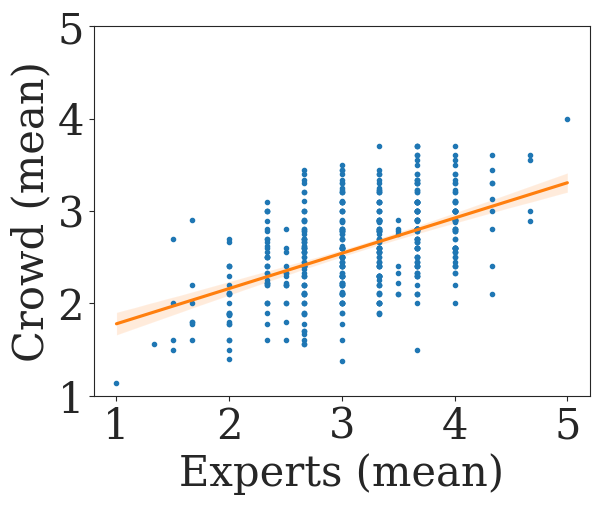

In [48]:
plt.plot(df["overall_quality_mean_experts"], df["overall_quality_mean_crowd"], ".")
sns.regplot(x=df["overall_quality_mean_experts"].values, y=df["overall_quality_mean_crowd"].values, scatter=False)
plt.yticks([1,2,3,4,5])
plt.xticks([1,2,3,4,5])
plt.xlabel("Experts (mean)")
plt.ylabel("Crowd (mean)")

In [49]:
df.head()

,id,text,title,cogency_mean_crowd,cogency_1,cogency_2,cogency_3,cogency_4,cogency_5,cogency_6,...,overall_quality_19,overall_quality_20,cogency_mean_weighted,cogency_mean,effectiveness_mean_weighted,effectiveness_mean,reasonableness_mean_weighted,reasonableness_mean,overall_quality_mean_weighted,overall_quality_mean
0,268zag--500--http://www.reddit.com/r/changemyv...,I believe that this solves a number of issues ...,CMV: I believe that people convicted of the de...,2.800000,NaN,NaN,NaN,3.0,NaN,2.0,...,4.0,4.0,3.400000,3.076923,3.400000,3.076923,2.983333,2.615385,3.300000,2.923077
1,26658r--501--http://www.reddit.com/r/changemyv...,I believe our lives are our own and no one ha...,CMV: I believe suicide and voluntary euthanasi...,2.900000,4.0,NaN,NaN,NaN,NaN,2.0,...,4.0,3.0,3.283333,3.076923,2.766667,2.461538,2.600000,2.384615,2.866667,2.615385
2,2660q8--502--http://www.reddit.com/r/changemyv...,I think ADHD and perhaps some forms of autism ...,CMV: ADHD and autism isn't a disease but the n...,3.222222,NaN,3.0,NaN,NaN,NaN,3.0,...,4.0,2.0,3.111111,3.166667,3.111111,3.166667,2.888889,3.000000,3.111111,3.166667
3,265xv5--503--http://www.reddit.com/r/changemyv...,"You can be a kind, compassionate person and ba...","CMV: Life is not fair, and it is an important ...",2.900000,3.0,2.0,NaN,NaN,2.0,3.0,...,3.0,3.0,3.450000,3.153846,2.866667,2.615385,2.816667,2.538462,2.750000,2.615385
4,265lg5--504--http://www.reddit.com/r/changemyv...,Look at the brain from a physical/chemical per...,CMV. I don't believe in freewill.,2.800000,NaN,NaN,NaN,2.0,NaN,3.0,...,4.0,4.0,3.233333,3.000000,3.133333,2.846154,2.633333,2.615385,2.966667,2.769231


### Wasserstein

In [9]:
df = pd.read_csv("gaq.csv")

In [10]:
dimensions = [col.replace("_mean", "") for col in df.columns if col.endswith('_mean')]
dimensions

['cogency', 'effectiveness', 'reasonableness', 'overall_quality']

In [11]:
df.columns

Index(['id', 'text', 'title', 'cogency_mean_crowd', 'cogency_1', 'cogency_2',
       'cogency_3', 'cogency_4', 'cogency_5', 'cogency_6', 'cogency_7',
       'cogency_8', 'cogency_9', 'cogency_10', 'cogency_11', 'cogency_12',
       'cogency_13', 'cogency_14', 'cogency_15', 'cogency_16', 'cogency_17',
       'effectiveness_mean_crowd', 'effectiveness_1', 'effectiveness_2',
       'effectiveness_3', 'effectiveness_4', 'effectiveness_5',
       'effectiveness_6', 'effectiveness_7', 'effectiveness_8',
       'effectiveness_9', 'effectiveness_10', 'effectiveness_11',
       'effectiveness_12', 'effectiveness_13', 'effectiveness_14',
       'effectiveness_15', 'effectiveness_16', 'effectiveness_17',
       'reasonableness_mean_crowd', 'reasonableness_1', 'reasonableness_2',
       'reasonableness_3', 'reasonableness_4', 'reasonableness_5',
       'reasonableness_6', 'reasonableness_7', 'reasonableness_8',
       'reasonableness_9', 'reasonableness_10', 'reasonableness_11',
       'reasonable

In [12]:
df_expert = df[["id"] + [f"{dim}_{i}" for dim in dimensions for i in range(18,21)]]
df_crowd = df[["id"] + [f"{dim}_{i}" for dim in dimensions for i in range(1,18)]]
df_expert = df_expert.rename(columns={f"{dim}_{i}": f"{dim}_{i-17}" for dim in dimensions for i in range(18,21)})

In [13]:
df_expert.head()

,id,cogency_1,cogency_2,cogency_3,effectiveness_1,effectiveness_2,effectiveness_3,reasonableness_1,reasonableness_2,reasonableness_3,overall_quality_1,overall_quality_2,overall_quality_3
0,268zag--500--http://www.reddit.com/r/changemyv...,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0
1,26658r--501--http://www.reddit.com/r/changemyv...,4.0,4.0,3.0,3.0,4.0,3.0,2.0,4.0,3.0,3.0,4.0,3.0
2,2660q8--502--http://www.reddit.com/r/changemyv...,4.0,4.0,1.0,3.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,2.0
3,265xv5--503--http://www.reddit.com/r/changemyv...,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0
4,265lg5--504--http://www.reddit.com/r/changemyv...,3.0,4.0,4.0,3.0,4.0,4.0,1.0,3.0,4.0,2.0,4.0,4.0


In [18]:
# we can only compare the novices and the experts on the subdimensions that the novices annotated
# dimensions = [col.replace("_mean", "") for col in df_novice.columns if col.endswith('_mean')]
res_cols = ["id"]
for dim in dimensions:
    res_cols.append(dim+"_wasserstein")

res_df = pd.DataFrame(columns=res_cols)
for _, row in df_expert.iterrows():
    res_row = []
    if len(df_crowd[df_crowd["id"] == row["id"]]) != 0:
        res_row.append(row["id"])
        for dim in dimensions:
            dist_exp = get_distribution(row, dim, expert_annotators, num_labels=5)
            dist_crowd = get_distribution(df_crowd[df_crowd["id"] == row["id"]].iloc[0], dim, crowd_annotators, num_labels=5)
            if dist_exp is np.nan or dist_crowd is np.nan:
                wasserstein = np.nan
            else:
                wasserstein = wasserstein_distance(dist_exp, dist_crowd)
            res_row.append(wasserstein)
        res_df = pd.concat([res_df, pd.DataFrame([res_row], columns=res_cols)])

/var/folders/bn/zpqsg90d5y3g9k334bz2cb600000gn/T/ipykernel_17807/2099282751.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame([res_row], columns=res_cols)])


In [19]:
res_df.describe()

,cogency_wasserstein,effectiveness_wasserstein,reasonableness_wasserstein,overall_quality_wasserstein
count,538.000000,538.000000,538.000000,538.000000
mean,0.111165,0.121556,0.109615,0.109486
std,0.056248,0.060926,0.055285,0.057154
min,0.013333,0.000000,0.000000,0.000000
25%,0.080000,0.080000,0.080000,0.066667
50%,0.100000,0.120000,0.100000,0.093333
75%,0.133333,0.160000,0.133333,0.133333
max,0.280000,0.280000,0.280000,0.280000
